<a href="https://colab.research.google.com/github/OrsonTyphanel93/Deep-Learning-Orson-/blob/master/tip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#super useful tools for code development 
!pip install howdoi

In [ ]:
!howdoi Bidirectional LSTM encoder-decoder and attention mechanism

encoder_state = []

for layer_id in range(num_layers):
    state_fw = bi_encoder_state[0][layer_id]
    state_bw = bi_encoder_state[1][layer_id]

    # Merging the fw state and the bw state
    cell_state = tf.concat([state_fw.c, state_bw.c], 1)
    hidden_state= tf.concat([state_fw.h, state_bw.h], 1)

    # This state as the same structure than an uni-directional encoder state
    state = tf.nn.rnn_cell.LSTMStateTuple(c=cell_state, h=hidden_state)

    encoder_state.append(state)

encoder_state = tuple(encoder_state)


In [ ]:
!howdoi lyapunov spectrum 

clear
close all 

rvalues = 20:1:200;
N = 100; 
fs = 5;
r = rvalues; 
x = rand(1);
a = 1;
X = zeros(N,length(r));


for n=1: 0.3*N 
    x=(1/a).*mod(r.*x.*(1-sin(x)),a); 
    X(n,:) = x;
end

lyapExp = lyapunovExponent(X,fs);
%Calling without a return variable so plot is not suppressed%
lyapunovExponent(X,fs);


In [ ]:
!howdoi dense layer + Batch Normalization  

# import BatchNormalization
from keras.layers.normalization import BatchNormalization

# instantiate model
model = Sequential()

# we can think of this chunk as the input layer
model.add(Dense(64, input_dim=14, init='uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))

# we can think of this chunk as the hidden layer    
model.add(Dense(64, init='uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))

# we can think of this chunk as the output layer
model.add(Dense(2, init='uniform'))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# setting up the optimization of our weights 
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd)

# running the fitting
model.fit(X_train, y_train, nb_epoch=20, batch_size=16, show_accuracy=True, validation_split=0.2, verbose = 2)


In [ ]:
!howdoi Bidirectional LSTM attention 

from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

class Attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(Attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)


In [ ]:
!howdoi Bidirectional LSTM attention + dense layer 

from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

class Attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(Attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)


In [ ]:
!howdoi  Bidirectional LSTM encoder decoder 

from keras.layers import LSTM,Bidirectional,Input,Concatenate
from keras.models import Model

n_units = 8
n_input = 1
n_output = 1

# encoder
encoder_inputs = Input(shape=(None, n_input))
encoder = Bidirectional(LSTM(n_units, return_state=True))
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder(encoder_inputs)
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
encoder_states = [state_h, state_c]

# decoder
decoder_inputs = Input(shape=(None, n_output))    
decoder_lstm = LSTM(n_units*2, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(n_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


# define inference encoder
encoder_model = Model(encoder_inputs, encoder_states)
# define inference decoder
decoder_state_input_h = Input(shape=

In [ ]:
!howdoi xgboost implemetation python  

import xgboost as xgb
from sklearn.cross_validation import train_test_split as ttsplit
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error as mse

X = load_boston()['data']
y = load_boston()['target']

# split data into training and testing sets
# then split training set in half
X_train, X_test, y_train, y_test = ttsplit(X, y, test_size=0.1, random_state=0)
X_train_1, X_train_2, y_train_1, y_train_2 = ttsplit(X_train, 
                                                     y_train, 
                                                     test_size=0.5,
                                                     random_state=0)

xg_train_1 = xgb.DMatrix(X_train_1, label=y_train_1)
xg_train_2 = xgb.DMatrix(X_train_2, label=y_train_2)
xg_test = xgb.DMatrix(X_test, label=y_test)

params = {'objective': 'reg:linear', 'verbose': False}
model_1 = xgb.train(params, xg_train_1, 30)
model_1.save_model('model_1.model')

# ================= train two versions of the model =

In [ ]:
!howdoi image recognition model example python 

In [ ]:
tf.keras.layers.Bidirectional(
    layer,
    merge_mode='concat',
    weights=None,
    backward_layer=None,
    **kwargs
)


model = Sequential()
model.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=(5, 10)))
model.add(Bidirectional(LSTM(10)))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

 # With custom backward layer
 model = Sequential()
 forward_layer = LSTM(10, return_sequences=True)
 backward_layer = LSTM(10, activation='relu', return_sequences=True,
                       go_backwards=True)
 model.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                         input_shape=(5, 10)))
 model.add(Dense(5))
 model.add(Activation('softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [ ]:
!howdoi Bidirectional LSTM 

In [ ]:
!howdoi dense layer + batch normalization  

# import BatchNormalization
from keras.layers.normalization import BatchNormalization

# instantiate model
model = Sequential()

# we can think of this chunk as the input layer
model.add(Dense(64, input_dim=14, init='uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))

# we can think of this chunk as the hidden layer    
model.add(Dense(64, init='uniform'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))

# we can think of this chunk as the output layer
model.add(Dense(2, init='uniform'))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# setting up the optimization of our weights 
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd)

# running the fitting
model.fit(X_train, y_train, nb_epoch=20, batch_size=16, show_accuracy=True, validation_split=0.2, verbose = 2)


In [ ]:
!howdoi  Bidirectional LSTM encoder decoder 

from keras.layers import LSTM,Bidirectional,Input,Concatenate
from keras.models import Model

n_units = 8
n_input = 1
n_output = 1

# encoder
encoder_inputs = Input(shape=(None, n_input))
encoder = Bidirectional(LSTM(n_units, return_state=True))
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder(encoder_inputs)
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
encoder_states = [state_h, state_c]

# decoder
decoder_inputs = Input(shape=(None, n_output))    
decoder_lstm = LSTM(n_units*2, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(n_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


# define inference encoder
encoder_model = Model(encoder_inputs, encoder_states)
# define inference decoder
decoder_state_input_h = Input(shape=

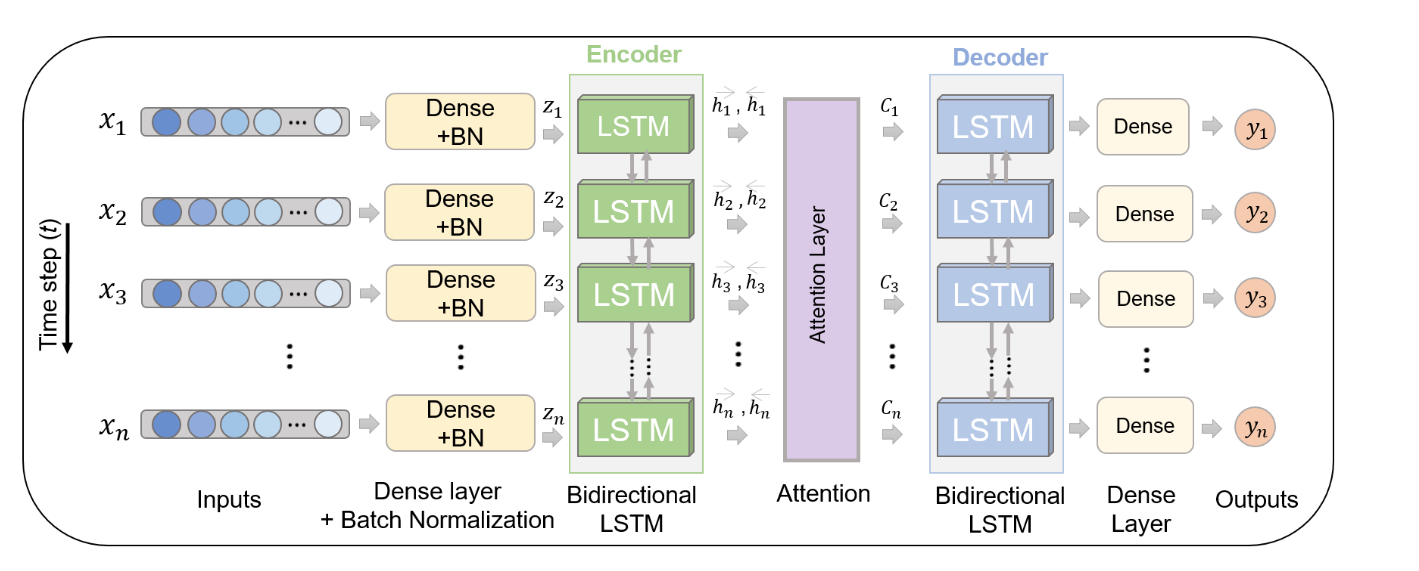

In [ ]:
from random import randint

# generate a sequence of random integers
def generate_sequence(length, n_unique):
	return [randint(0, n_unique-1) for _ in range(length)]

# generate random sequence
sequence = generate_sequence(5, 50)
print(sequence)

In [ ]:
# one hot encode sequence
def one_hot_encode(sequence, n_unique):
	encoding = list()
	for value in sequence:
		vector = [0 for _ in range(n_unique)]
		vector[value] = 1
		encoding.append(vector)
	return array(encoding)

In [ ]:
# decode a one hot encoded string
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]

In [ ]:
from random import randint
from numpy import array
from numpy import argmax

# generate a sequence of random integers
def generate_sequence(length, n_unique):
	return [randint(0, n_unique-1) for _ in range(length)]

# one hot encode sequence
def one_hot_encode(sequence, n_unique):
	encoding = list()
	for value in sequence:
		vector = [0 for _ in range(n_unique)]
		vector[value] = 1
		encoding.append(vector)
	return array(encoding)

# decode a one hot encoded string
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]

# generate random sequence
sequence = generate_sequence(5, 50)
print(sequence)
# one hot encode
encoded = one_hot_encode(sequence, 50)
print(encoded)
# decode
decoded = one_hot_decode(encoded)
print(decoded)

In [ ]:
# prepare data for the LSTM
def get_pair(n_in, n_out, n_unique):
	# generate random sequence
	sequence_in = generate_sequence(n_in, n_unique)
	sequence_out = sequence_in[:n_out] + [0 for _ in range(n_in-n_out)]
	# one hot encode
	X = one_hot_encode(sequence_in, n_unique)
	y = one_hot_encode(sequence_out, n_unique)
	# reshape as 3D
	X = X.reshape((1, X.shape[0], X.shape[1]))
	y = y.reshape((1, y.shape[0], y.shape[1]))
	return X,y

In [ ]:
from random import randint
from numpy import array
from numpy import argmax

# generate a sequence of random integers
def generate_sequence(length, n_unique):
	return [randint(0, n_unique-1) for _ in range(length)]

# one hot encode sequence
def one_hot_encode(sequence, n_unique):
	encoding = list()
	for value in sequence:
		vector = [0 for _ in range(n_unique)]
		vector[value] = 1
		encoding.append(vector)
	return array(encoding)

# decode a one hot encoded string
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]

# prepare data for the LSTM
def get_pair(n_in, n_out, n_unique):
	# generate random sequence
	sequence_in = generate_sequence(n_in, n_unique)
	sequence_out = sequence_in[:n_out] + [0 for _ in range(n_in-n_out)]
	# one hot encode
	X = one_hot_encode(sequence_in, n_unique)
	y = one_hot_encode(sequence_out, n_unique)
	# reshape as 3D
	X = X.reshape((1, X.shape[0], X.shape[1]))
	y = y.reshape((1, y.shape[0], y.shape[1]))
	return X,y

# generate random sequence
X, y = get_pair(5, 2, 50)
print(X.shape, y.shape)
print('X=%s, y=%s' % (one_hot_decode(X[0]), one_hot_decode(y[0])))



# Encoder-Decoder Without Attention



In [ ]:
# configure problem
n_features = 50
n_timesteps_in = 5
n_timesteps_out = 2

In [ ]:
# define model
model = Sequential()
model.add(LSTM(150, input_shape=(n_timesteps_in, n_features)))
model.add(RepeatVector(n_timesteps_in))
model.add(LSTM(150, return_sequences=True))
model.add(TimeDistributed(Dense(n_features, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train LSTM
for epoch in range(5000):
	# generate new random sequence
	X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=1, verbose=2)

In [ ]:
# evaluate LSTM
total, correct = 100, 0
for _ in range(total):
	X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
	yhat = model.predict(X, verbose=0)
	if array_equal(one_hot_decode(y[0]), one_hot_decode(yhat[0])):
		correct += 1
print('Accuracy: %.2f%%' % (float(correct)/float(total)*100.0))

In [ ]:
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector

# generate a sequence of random integers
def generate_sequence(length, n_unique):
	return [randint(0, n_unique-1) for _ in range(length)]

# one hot encode sequence
def one_hot_encode(sequence, n_unique):
	encoding = list()
	for value in sequence:
		vector = [0 for _ in range(n_unique)]
		vector[value] = 1
		encoding.append(vector)
	return array(encoding)

# decode a one hot encoded string
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]

# prepare data for the LSTM
def get_pair(n_in, n_out, cardinality):
	# generate random sequence
	sequence_in = generate_sequence(n_in, cardinality)
	sequence_out = sequence_in[:n_out] + [0 for _ in range(n_in-n_out)]
	# one hot encode
	X = one_hot_encode(sequence_in, cardinality)
	y = one_hot_encode(sequence_out, cardinality)
	# reshape as 3D
	X = X.reshape((1, X.shape[0], X.shape[1]))
	y = y.reshape((1, y.shape[0], y.shape[1]))
	return X,y

# configure problem
n_features = 50
n_timesteps_in = 5
n_timesteps_out = 2
# define model
model = Sequential()
model.add(LSTM(150, input_shape=(n_timesteps_in, n_features)))
model.add(RepeatVector(n_timesteps_in))
model.add(LSTM(150, return_sequences=True))
model.add(TimeDistributed(Dense(n_features, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# train LSTM
for epoch in range(5000):
	# generate new random sequence
	X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=1, verbose=2)
# evaluate LSTM
total, correct = 100, 0
for _ in range(total):
	X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
	yhat = model.predict(X, verbose=0)
	if array_equal(one_hot_decode(y[0]), one_hot_decode(yhat[0])):
		correct += 1
print('Accuracy: %.2f%%' % (float(correct)/float(total)*100.0))
# spot check some examples
for _ in range(10):
	X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
	yhat = model.predict(X, verbose=0)
	print('Expected:', one_hot_decode(y[0]), 'Predicted', one_hot_decode(yhat[0]))

# Custom Keras Attention Layer

In [ ]:
import tensorflow as tf
from keras import backend as K
from keras import regularizers, constraints, initializers, activations
from keras.layers.recurrent import Recurrent, _time_distributed_dense
from keras.engine import InputSpec

tfPrint = lambda d, T: tf.Print(input_=T, data=[T, tf.shape(T)], message=d)

class AttentionDecoder(Recurrent):

    def __init__(self, units, output_dim,
                 activation='tanh',
                 return_probabilities=False,
                 name='AttentionDecoder',
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 bias_constraint=None,
                 **kwargs):
        """
        Implements an AttentionDecoder that takes in a sequence encoded by an
        encoder and outputs the decoded states
        :param units: dimension of the hidden state and the attention matrices
        :param output_dim: the number of labels in the output space

        references:
            Bahdanau, Dzmitry, Kyunghyun Cho, and Yoshua Bengio.
            "Neural machine translation by jointly learning to align and translate."
            arXiv preprint arXiv:1409.0473 (2014).
        """
        self.units = units
        self.output_dim = output_dim
        self.return_probabilities = return_probabilities
        self.activation = activations.get(activation)
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.recurrent_initializer = initializers.get(recurrent_initializer)
        self.bias_initializer = initializers.get(bias_initializer)

        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.recurrent_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)

        self.kernel_constraint = constraints.get(kernel_constraint)
        self.recurrent_constraint = constraints.get(kernel_constraint)
        self.bias_constraint = constraints.get(bias_constraint)

        super(AttentionDecoder, self).__init__(**kwargs)
        self.name = name
        self.return_sequences = True  # must return sequences

    def build(self, input_shape):
        """
          See Appendix 2 of Bahdanau 2014, arXiv:1409.0473
          for model details that correspond to the matrices here.
        """

        self.batch_size, self.timesteps, self.input_dim = input_shape

        if self.stateful:
            super(AttentionDecoder, self).reset_states()

        self.states = [None, None]  # y, s

        """
            Matrices for creating the context vector
        """

        self.V_a = self.add_weight(shape=(self.units,),
                                   name='V_a',
                                   initializer=self.kernel_initializer,
                                   regularizer=self.kernel_regularizer,
                                   constraint=self.kernel_constraint)
        self.W_a = self.add_weight(shape=(self.units, self.units),
                                   name='W_a',
                                   initializer=self.kernel_initializer,
                                   regularizer=self.kernel_regularizer,
                                   constraint=self.kernel_constraint)
        self.U_a = self.add_weight(shape=(self.input_dim, self.units),
                                   name='U_a',
                                   initializer=self.kernel_initializer,
                                   regularizer=self.kernel_regularizer,
                                   constraint=self.kernel_constraint)
        self.b_a = self.add_weight(shape=(self.units,),
                                   name='b_a',
                                   initializer=self.bias_initializer,
                                   regularizer=self.bias_regularizer,
                                   constraint=self.bias_constraint)
        """
            Matrices for the r (reset) gate
        """
        self.C_r = self.add_weight(shape=(self.input_dim, self.units),
                                   name='C_r',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.U_r = self.add_weight(shape=(self.units, self.units),
                                   name='U_r',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.W_r = self.add_weight(shape=(self.output_dim, self.units),
                                   name='W_r',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.b_r = self.add_weight(shape=(self.units, ),
                                   name='b_r',
                                   initializer=self.bias_initializer,
                                   regularizer=self.bias_regularizer,
                                   constraint=self.bias_constraint)

        """
            Matrices for the z (update) gate
        """
        self.C_z = self.add_weight(shape=(self.input_dim, self.units),
                                   name='C_z',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.U_z = self.add_weight(shape=(self.units, self.units),
                                   name='U_z',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.W_z = self.add_weight(shape=(self.output_dim, self.units),
                                   name='W_z',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.b_z = self.add_weight(shape=(self.units, ),
                                   name='b_z',
                                   initializer=self.bias_initializer,
                                   regularizer=self.bias_regularizer,
                                   constraint=self.bias_constraint)
        """
            Matrices for the proposal
        """
        self.C_p = self.add_weight(shape=(self.input_dim, self.units),
                                   name='C_p',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.U_p = self.add_weight(shape=(self.units, self.units),
                                   name='U_p',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.W_p = self.add_weight(shape=(self.output_dim, self.units),
                                   name='W_p',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.b_p = self.add_weight(shape=(self.units, ),
                                   name='b_p',
                                   initializer=self.bias_initializer,
                                   regularizer=self.bias_regularizer,
                                   constraint=self.bias_constraint)
        """
            Matrices for making the final prediction vector
        """
        self.C_o = self.add_weight(shape=(self.input_dim, self.output_dim),
                                   name='C_o',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.U_o = self.add_weight(shape=(self.units, self.output_dim),
                                   name='U_o',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.W_o = self.add_weight(shape=(self.output_dim, self.output_dim),
                                   name='W_o',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.b_o = self.add_weight(shape=(self.output_dim, ),
                                   name='b_o',
                                   initializer=self.bias_initializer,
                                   regularizer=self.bias_regularizer,
                                   constraint=self.bias_constraint)

        # For creating the initial state:
        self.W_s = self.add_weight(shape=(self.input_dim, self.units),
                                   name='W_s',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)

        self.input_spec = [
            InputSpec(shape=(self.batch_size, self.timesteps, self.input_dim))]
        self.built = True

    def call(self, x):
        # store the whole sequence so we can "attend" to it at each timestep
        self.x_seq = x

        # apply the a dense layer over the time dimension of the sequence
        # do it here because it doesn't depend on any previous steps
        # thefore we can save computation time:
        self._uxpb = _time_distributed_dense(self.x_seq, self.U_a, b=self.b_a,
                                             input_dim=self.input_dim,
                                             timesteps=self.timesteps,
                                             output_dim=self.units)

        return super(AttentionDecoder, self).call(x)

    def get_initial_state(self, inputs):
        # apply the matrix on the first time step to get the initial s0.
        s0 = activations.tanh(K.dot(inputs[:, 0], self.W_s))

        # from keras.layers.recurrent to initialize a vector of (batchsize,
        # output_dim)
        y0 = K.zeros_like(inputs)  # (samples, timesteps, input_dims)
        y0 = K.sum(y0, axis=(1, 2))  # (samples, )
        y0 = K.expand_dims(y0)  # (samples, 1)
        y0 = K.tile(y0, [1, self.output_dim])

        return [y0, s0]

    def step(self, x, states):

        ytm, stm = states

        # repeat the hidden state to the length of the sequence
        _stm = K.repeat(stm, self.timesteps)

        # now multiplty the weight matrix with the repeated hidden state
        _Wxstm = K.dot(_stm, self.W_a)

        # calculate the attention probabilities
        # this relates how much other timesteps contributed to this one.
        et = K.dot(activations.tanh(_Wxstm + self._uxpb),
                   K.expand_dims(self.V_a))
        at = K.exp(et)
        at_sum = K.sum(at, axis=1)
        at_sum_repeated = K.repeat(at_sum, self.timesteps)
        at /= at_sum_repeated  # vector of size (batchsize, timesteps, 1)

        # calculate the context vector
        context = K.squeeze(K.batch_dot(at, self.x_seq, axes=1), axis=1)
        # ~~~> calculate new hidden state
        # first calculate the "r" gate:

        rt = activations.sigmoid(
            K.dot(ytm, self.W_r)
            + K.dot(stm, self.U_r)
            + K.dot(context, self.C_r)
            + self.b_r)

        # now calculate the "z" gate
        zt = activations.sigmoid(
            K.dot(ytm, self.W_z)
            + K.dot(stm, self.U_z)
            + K.dot(context, self.C_z)
            + self.b_z)

        # calculate the proposal hidden state:
        s_tp = activations.tanh(
            K.dot(ytm, self.W_p)
            + K.dot((rt * stm), self.U_p)
            + K.dot(context, self.C_p)
            + self.b_p)

        # new hidden state:
        st = (1-zt)*stm + zt * s_tp

        yt = activations.softmax(
            K.dot(ytm, self.W_o)
            + K.dot(stm, self.U_o)
            + K.dot(context, self.C_o)
            + self.b_o)

        if self.return_probabilities:
            return at, [yt, st]
        else:
            return yt, [yt, st]

    def compute_output_shape(self, input_shape):
        """
            For Keras internal compatability checking
        """
        if self.return_probabilities:
            return (None, self.timesteps, self.timesteps)
        else:
            return (None, self.timesteps, self.output_dim)

    def get_config(self):
        """
            For rebuilding models on load time.
        """
        config = {
            'output_dim': self.output_dim,
            'units': self.units,
            'return_probabilities': self.return_probabilities
        }
        base_config = super(AttentionDecoder, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

# Encoder-Decoder With Attention

In [ ]:
from attention_decoder import AttentionDecoder

In [ ]:
# define model
model = Sequential()
model.add(LSTM(150, input_shape=(n_timesteps_in, n_features), return_sequences=True))
model.add(AttentionDecoder(150, n_features))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras.models import Sequential
from keras.layers import LSTM
from attention_decoder import AttentionDecoder

# generate a sequence of random integers
def generate_sequence(length, n_unique):
	return [randint(0, n_unique-1) for _ in range(length)]

# one hot encode sequence
def one_hot_encode(sequence, n_unique):
	encoding = list()
	for value in sequence:
		vector = [0 for _ in range(n_unique)]
		vector[value] = 1
		encoding.append(vector)
	return array(encoding)

# decode a one hot encoded string
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]

# prepare data for the LSTM
def get_pair(n_in, n_out, cardinality):
	# generate random sequence
	sequence_in = generate_sequence(n_in, cardinality)
	sequence_out = sequence_in[:n_out] + [0 for _ in range(n_in-n_out)]
	# one hot encode
	X = one_hot_encode(sequence_in, cardinality)
	y = one_hot_encode(sequence_out, cardinality)
	# reshape as 3D
	X = X.reshape((1, X.shape[0], X.shape[1]))
	y = y.reshape((1, y.shape[0], y.shape[1]))
	return X,y

# configure problem
n_features = 50
n_timesteps_in = 5
n_timesteps_out = 2

# define model
model = Sequential()
model.add(LSTM(150, input_shape=(n_timesteps_in, n_features), return_sequences=True))
model.add(AttentionDecoder(150, n_features))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# train LSTM
for epoch in range(5000):
	# generate new random sequence
	X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=1, verbose=2)
# evaluate LSTM
total, correct = 100, 0
for _ in range(total):
	X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
	yhat = model.predict(X, verbose=0)
	if array_equal(one_hot_decode(y[0]), one_hot_decode(yhat[0])):
		correct += 1
print('Accuracy: %.2f%%' % (float(correct)/float(total)*100.0))
# spot check some examples
for _ in range(10):
	X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
	yhat = model.predict(X, verbose=0)
	print('Expected:', one_hot_decode(y[0]), 'Predicted', one_hot_decode(yhat[0]))

# Comparison of Models

In [ ]:
# define the encoder-decoder model
def baseline_model(n_timesteps_in, n_features):
	model = Sequential()
	model.add(LSTM(150, input_shape=(n_timesteps_in, n_features)))
	model.add(RepeatVector(n_timesteps_in))
	model.add(LSTM(150, return_sequences=True))
	model.add(TimeDistributed(Dense(n_features, activation='softmax')))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define the encoder-decoder with attention model
def attention_model(n_timesteps_in, n_features):
	model = Sequential()
	model.add(LSTM(150, input_shape=(n_timesteps_in, n_features), return_sequences=True))
	model.add(AttentionDecoder(150, n_features))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
# train and evaluate a model, return accuracy
def train_evaluate_model(model, n_timesteps_in, n_timesteps_out, n_features):
	# train LSTM
	for epoch in range(5000):
		# generate new random sequence
		X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
		# fit model for one epoch on this sequence
		model.fit(X, y, epochs=1, verbose=0)
	# evaluate LSTM
	total, correct = 100, 0
	for _ in range(total):
		X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
		yhat = model.predict(X, verbose=0)
		if array_equal(one_hot_decode(y[0]), one_hot_decode(yhat[0])):
			correct += 1
	return float(correct)/float(total)*100.0

In [ ]:
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from attention_decoder import AttentionDecoder

# generate a sequence of random integers
def generate_sequence(length, n_unique):
	return [randint(0, n_unique-1) for _ in range(length)]

# one hot encode sequence
def one_hot_encode(sequence, n_unique):
	encoding = list()
	for value in sequence:
		vector = [0 for _ in range(n_unique)]
		vector[value] = 1
		encoding.append(vector)
	return array(encoding)

# decode a one hot encoded string
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]

# prepare data for the LSTM
def get_pair(n_in, n_out, cardinality):
	# generate random sequence
	sequence_in = generate_sequence(n_in, cardinality)
	sequence_out = sequence_in[:n_out] + [0 for _ in range(n_in-n_out)]
	# one hot encode
	X = one_hot_encode(sequence_in, cardinality)
	y = one_hot_encode(sequence_out, cardinality)
	# reshape as 3D
	X = X.reshape((1, X.shape[0], X.shape[1]))
	y = y.reshape((1, y.shape[0], y.shape[1]))
	return X,y

# define the encoder-decoder model
def baseline_model(n_timesteps_in, n_features):
	model = Sequential()
	model.add(LSTM(150, input_shape=(n_timesteps_in, n_features)))
	model.add(RepeatVector(n_timesteps_in))
	model.add(LSTM(150, return_sequences=True))
	model.add(TimeDistributed(Dense(n_features, activation='softmax')))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define the encoder-decoder with attention model
def attention_model(n_timesteps_in, n_features):
	model = Sequential()
	model.add(LSTM(150, input_shape=(n_timesteps_in, n_features), return_sequences=True))
	model.add(AttentionDecoder(150, n_features))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# train and evaluate a model, return accuracy
def train_evaluate_model(model, n_timesteps_in, n_timesteps_out, n_features):
	# train LSTM
	for epoch in range(5000):
		# generate new random sequence
		X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
		# fit model for one epoch on this sequence
		model.fit(X, y, epochs=1, verbose=0)
	# evaluate LSTM
	total, correct = 100, 0
	for _ in range(total):
		X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
		yhat = model.predict(X, verbose=0)
		if array_equal(one_hot_decode(y[0]), one_hot_decode(yhat[0])):
			correct += 1
	return float(correct)/float(total)*100.0

# configure problem
n_features = 50
n_timesteps_in = 5
n_timesteps_out = 2
n_repeats = 10
# evaluate encoder-decoder model
print('Encoder-Decoder Model')
results = list()
for _ in range(n_repeats):
	model = baseline_model(n_timesteps_in, n_features)
	accuracy = train_evaluate_model(model, n_timesteps_in, n_timesteps_out, n_features)
	results.append(accuracy)
	print(accuracy)
print('Mean Accuracy: %.2f%%' % (sum(results)/float(n_repeats)))
# evaluate encoder-decoder with attention model
print('Encoder-Decoder With Attention Model')
results = list()
for _ in range(n_repeats):
	model = attention_model(n_timesteps_in, n_features)
	accuracy = train_evaluate_model(model, n_timesteps_in, n_timesteps_out, n_features)
	results.append(accuracy)
	print(accuracy)
print('Mean Accuracy: %.2f%%' % (sum(results)/float(n_repeats)))